# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
data_complete.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count = len(mouse_metadata["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = mouse_metadata.loc[mouse_metadata["Mouse ID"]=="g989"]
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_complete_clean = data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(data_complete_clean["Mouse ID"].unique())
mice_count_clean

249

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_mean = data_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(numeric_only=True)
drug_regimen_mean.name = "Mean Tumor Volume"


In [38]:
drug_regimen_median = data_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(numeric_only=True)
drug_regimen_median.name = "Median Tumor Volume"


In [39]:
drug_regimen_variance = data_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_variance.name = "Tumor Volume Variance"

In [40]:
drug_regimen_std = data_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_std.name = "Tumor Volume Std. Dev."

In [41]:
drug_regimen_sem = data_complete_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_regimen_sem.name = "Tumor Volume Std. Err."

In [42]:
summary_by_group=pd.concat([drug_regimen_mean, drug_regimen_median, drug_regimen_variance, drug_regimen_std, drug_regimen_sem], axis=1)

In [43]:
summary_by_group

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

data_complete_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [134]:
import numpy as np
total_timepoints=data_complete_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['count'])


In [135]:
total_timepoints.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

<Figure size 640x480 with 0 Axes>

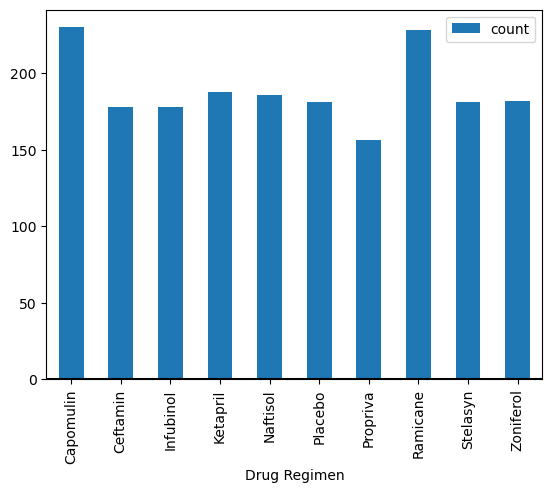

In [136]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.figure()

total_timepoints.plot.bar()

plt.axhline(0, color="k")

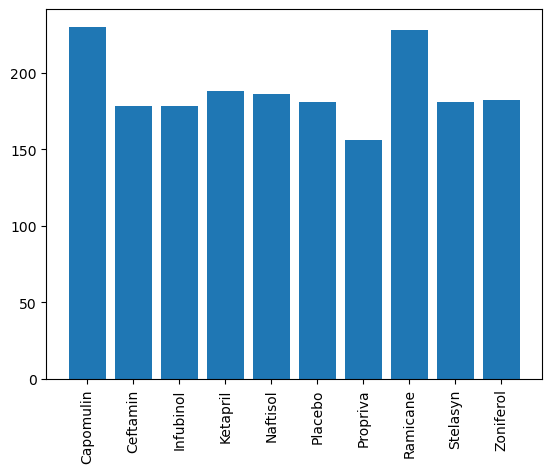

In [137]:
total_timepoints.reset_index(inplace=True)
x_axis=np.arange(0, len(total_timepoints))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, total_timepoints["count"])
plt.xticks(tick_locations, total_timepoints["Drug Regimen"], rotation = "vertical")
plt.show()

array([<AxesSubplot:ylabel='count'>], dtype=object)

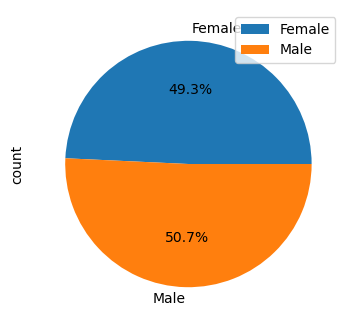

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution=data_complete_clean.groupby('Sex')["Mouse ID"].agg(['count'])
sex_distribution
sex_distribution.plot.pie(subplots=True, figsize=(8, 4), autopct="%1.1f%%")

In [148]:
sex_distribution

,count
Sex,
Female,930
Male,958


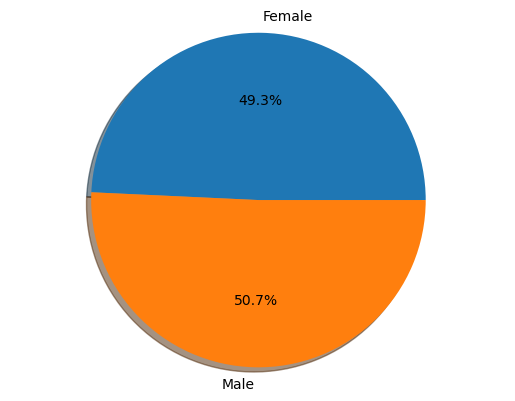

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Female", "Male"]
sex_counts = sex_distribution["count"].tolist()
plt.pie(sex_counts, labels = sexes, autopct = "%1.1f%%", shadow = True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

by_regimens = data_complete_clean.loc[(data_complete_clean["Drug Regimen"]=="Capomulin") | (data_complete_clean["Drug Regimen"]=="Ramicane") | (data_complete_clean["Drug Regimen"]=="Infubinol") | (data_complete_clean["Drug Regimen"]=="Ceftamin"), :]
by_regimens


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [179]:
# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = by_regimens.groupby("Mouse ID")["Timepoint"].max()
max_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_by_regimen = pd.merge(max_timepoints, by_regimens, how="left", on=["Mouse ID"])
max_timepoints_by_regimen





,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
809,z581,45,25,54.316407,2,Infubinol,Female,24,25
810,z581,45,30,56.286750,2,Infubinol,Female,24,25
811,z581,45,35,58.628399,3,Infubinol,Female,24,25
812,z581,45,40,60.053740,3,Infubinol,Female,24,25


In [181]:
max_timepoints_by_regimen_final = max_timepoints_by_regimen.loc[(max_timepoints_by_regimen["Timepoint_x"]==max_timepoints_by_regimen["Timepoint_y"]), :]
max_timepoints_by_regimen_final

,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a275,45,45,62.999356,3,Ceftamin,Female,20,28
39,a411,45,45,38.407618,1,Ramicane,Male,3,22
49,a444,45,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
773,y769,45,45,68.594745,4,Ceftamin,Female,6,27
783,y793,45,45,31.896238,2,Capomulin,Male,17,17
793,y865,45,45,64.729837,3,Ceftamin,Male,23,26
803,z578,45,45,30.638696,0,Ramicane,Male,11,16


In [188]:
final_tumors = max_timepoints_by_regimen_final["Tumor Volume (mm3)"]
final_tumors

9      67.973419
19     65.525743
29     62.999356
39     38.407618
49     43.047543
         ...    
773    68.594745
783    31.896238
793    64.729837
803    30.638696
813    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [191]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = final_tumors.quantile([.25, .5, .75])
upperq = quartiles[.75]
lowerq = quartiles[.25]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = lowerq + (1.5*iqr)
[lower_bound, upper_bound]

    


[3.0739668737500097, 71.30152073125]

In [193]:
# Determine outliers using upper and lower bounds
    
outliers = max_timepoints_by_regimen_final.loc[(max_timepoints_by_regimen_final["Tumor Volume (mm3)"]<3.0739668737500097) | (max_timepoints_by_regimen_final["Tumor Volume (mm3)"]>71.30152073125), :]
outliers


,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
130,c139,45,45,72.226731,2,Infubinol,Male,11,28


In [225]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group 
# Capomulin, Ramicane, Infubinol, and Ceftamin.
capomulin_tumors = max_timepoints_by_regimen_final.loc[(max_timepoints_by_regimen_final["Drug Regimen"]=="Capomulin"), :]
capomulin_tumor_sizes = capomulin_tumors["Tumor Volume (mm3)"]
capomulin_tumor_sizes


96     38.982878
113    38.939633
205    30.485985
215    37.074024
225    40.159220
276    47.685963
286    37.311846
296    38.125164
304    38.753265
399    41.483008
432    38.846876
452    28.430964
464    33.329098
549    46.539206
559    32.377357
586    41.581521
602    23.343598
622    40.728578
632    34.455298
660    31.023923
681    40.658124
684    39.952347
718    36.041047
729    28.484033
783    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [226]:
ramicane_tumors = max_timepoints_by_regimen_final.loc[(max_timepoints_by_regimen_final["Drug Regimen"]=="Ramicane"), :]
ramicane_tumor_sizes = ramicane_tumors["Tumor Volume (mm3)"]
ramicane_tumor_sizes

39     38.407618
49     43.047543
59     38.810366
76     32.978522
139    38.342008
149    33.397653
166    37.311236
186    40.659006
235    29.128472
247    33.562402
257    36.374510
324    31.560470
334    36.134852
354    22.050126
442    30.564625
474    31.095335
537    45.220869
545    36.561652
569    37.225650
576    43.419381
612    30.276232
650    40.667713
708    43.166373
763    44.183451
803    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [227]:
infubinol_tumors = max_timepoints_by_regimen_final.loc[(max_timepoints_by_regimen_final["Drug Regimen"]=="Infubinol"), :]
infubinol_tumor_sizes = infubinol_tumors["Tumor Volume (mm3)"]
infubinol_tumor_sizes

9      67.973419
19     65.525743
66     57.031862
86     66.083066
130    72.226731
132    36.321346
156    60.969711
176    62.435404
196    60.918767
266    67.289621
364    66.196912
372    62.117279
454    47.010364
481    60.165180
499    55.629428
501    45.699331
518    54.656549
592    55.650681
662    46.250112
667    54.048608
671    51.542431
699    50.005138
706    58.268442
759    67.685569
813    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [228]:
ceftamin_tumors = max_timepoints_by_regimen_final.loc[(max_timepoints_by_regimen_final["Drug Regimen"]=="Ceftamin"), :]
ceftamin_tumor_sizes = ceftamin_tumors["Tumor Volume (mm3)"]
ceftamin_tumor_sizes

29     62.999356
97     45.000000
103    56.057749
120    55.742829
200    48.722078
237    47.784682
314    61.849023
344    68.923185
382    67.748662
389    57.918381
402    46.784535
412    59.851956
422    64.299830
491    59.741901
511    61.433892
527    64.192341
633    45.000000
639    52.925348
640    45.000000
694    67.527482
719    45.000000
739    64.634949
749    61.386660
773    68.594745
793    64.729837
Name: Tumor Volume (mm3), dtype: float64

Text(0.5, 0.98, 'Drug Regimens v. Tumor Volume')

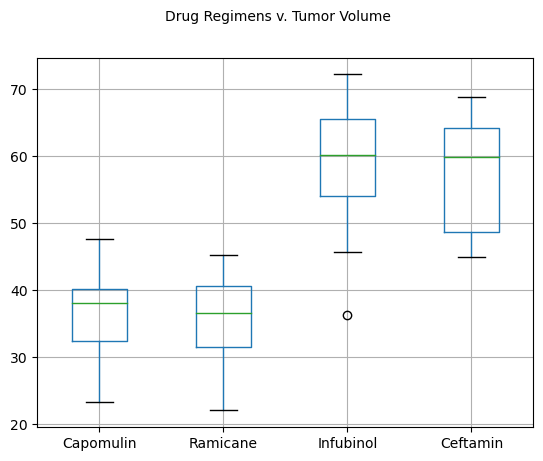

In [306]:
box_df = pd.concat([capomulin_tumor_sizes, ramicane_tumor_sizes], axis=1)
box_df.columns = ['Capomulin', 'Ramicane']

box_df_1 = pd.concat([box_df, infubinol_tumor_sizes], axis=1)
box_df_1.columns = ['Capomulin', 'Ramicane', 'Infubinol']

box_df_final = pd.concat([box_df_1, ceftamin_tumor_sizes], axis=1)
box_df_final.columns = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

ax = box_df_final.boxplot()
ax.get_figure().suptitle(t='Drug Regimens v. Tumor Volume', fontsize=10)



## Line and Scatter Plots

In [252]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

[10, 15, 20, 35, 45]

In [265]:
b128_capomulin_tumors = data_complete_clean.loc[(data_complete_clean["Mouse ID"]=="b128") & (data_complete_clean["Drug Regimen"]=="Capomulin"), :]
b128_capomulin_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [266]:
timepoints = b128_capomulin_tumors["Timepoint"].unique().tolist()
timepoints.sort()
timepoints


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

Text(0, 0.5, 'Tumor Volume (mm3)')

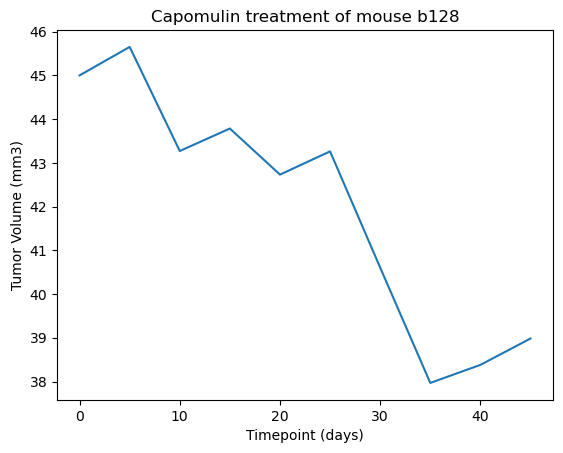

In [268]:
plt.plot(timepoints, b128_capomulin_tumors["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

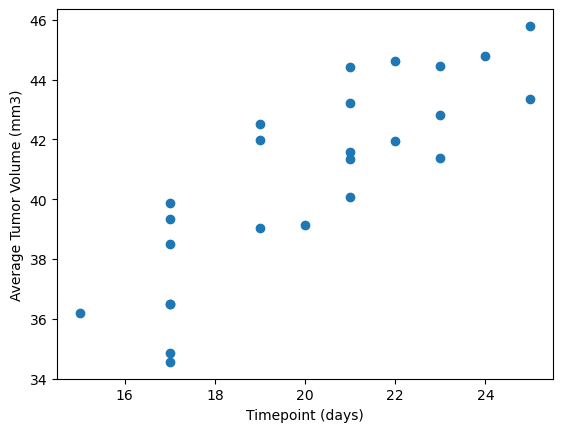

In [282]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_only = data_complete_clean.loc[(data_complete_clean["Drug Regimen"]=="Capomulin")]
capomulin_only_avg_weight = capomulin_only.groupby("Mouse ID").mean()
capomulin_only_avg_weight

plt.scatter(capomulin_only_avg_weight["Weight (g)"], capomulin_only_avg_weight["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

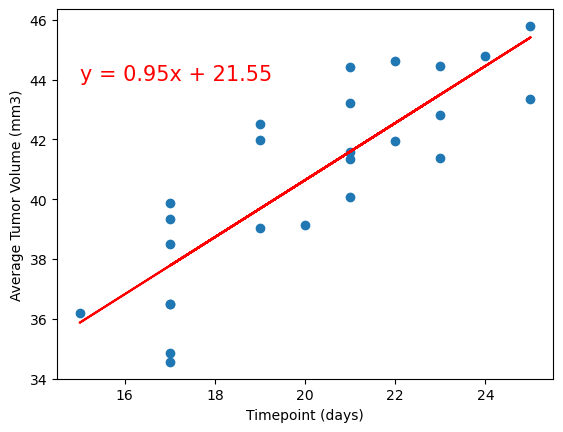

In [314]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_only_avg_weight["Weight (g)"], capomulin_only_avg_weight["Tumor Volume (mm3)"])
regress_values = capomulin_only_avg_weight["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(capomulin_only_avg_weight["Weight (g)"], capomulin_only_avg_weight["Tumor Volume (mm3)"])
plt.plot(capomulin_only_avg_weight["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (15, 44), fontsize=15, color="red")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [297]:
correlation = st.pearsonr(capomulin_only_avg_weight["Weight (g)"], capomulin_only_avg_weight["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]}')

The correlation between mouse weight and the average tumor volume is 0.8419363424694718
